# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [1]:
import pandas as pd
import numpy as np
import os
import zipfile
import urllib
import shutil
import geopandas as gp
import sklearn.cluster
from sklearn.cluster import KMeans
import scipy.cluster as scp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.environ["PUIDATA"] = "%s/001_PUI/PUIDATA"%os.getenv("HOME")
print("Path to PUIDATA", os.getenv("PUIDATA"))

Path to PUIDATA /nfshome/qg412/001_PUI/PUIDATA


**Downloading the zipcode shapefile & moving and unzipping it**

In [3]:
url = "https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip"
urllib.request.urlretrieve(url, "zipcode.zip")

('zipcode.zip', <http.client.HTTPMessage at 0x7f68f7d73eb8>)

In [4]:
os.system("unzip " "zipcode.zip" + " -d " + os.getenv('PUIDATA') + "/zipcodes")

256

**Downloading census bureau business data for all years 1993-2014**

In [5]:
urls = [
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp00totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp01totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp02totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp03totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp04totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp05totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp06totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp07totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp08totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp09totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp10totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp11totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp12totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp13totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp14totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp94totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp95totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp96totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp97totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp98totals.zip",
    "https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp99totals.zip"
]

In [6]:
#code credit @ https://gis.stackexchange.com/questions/4748/python-question-how-do-i-extract-a-part-of-a-string
#getting the correct filenames from the URLs

filenames = []

for url in urls:
    idx = url.find('zip')
    filenames.append(url[idx-12:])
    filenames.sort(reverse=False)

In [7]:
filenames

['zbp00totals.zip',
 'zbp01totals.zip',
 'zbp02totals.zip',
 'zbp03totals.zip',
 'zbp04totals.zip',
 'zbp05totals.zip',
 'zbp06totals.zip',
 'zbp07totals.zip',
 'zbp08totals.zip',
 'zbp09totals.zip',
 'zbp10totals.zip',
 'zbp11totals.zip',
 'zbp12totals.zip',
 'zbp13totals.zip',
 'zbp14totals.zip',
 'zbp94totals.zip',
 'zbp95totals.zip',
 'zbp96totals.zip',
 'zbp97totals.zip',
 'zbp98totals.zip',
 'zbp99totals.zip']

**Reading the zipped data**

In [8]:
# code credit: @yy2908
all_raw = pd.DataFrame()
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       1994, 1995, 1996, 1997, 1998, 1999]

for i in range(0,21):
    zf = zipfile.ZipFile(os.getenv("PUIDATA") + "/" + filenames[i])
    df = pd.read_csv(zf.open(filenames[i].replace('.zip','.txt')))
    df['Year'] = year[i]
    df.columns = [x.upper() for x in df.columns]
    df = df[['ZIP', 'EST', 'YEAR']]
    all_raw = all_raw.append(df)

In [9]:
all_raw.shape

(828791, 3)

In [10]:
# code credit: @yy2908
all = pd.pivot_table(all_raw, values="EST", index="ZIP", columns="YEAR")
all.head()

YEAR,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIP,,,,,,,,,,,,,,,,,,,,,
501,NaN,2.0,4.0,4.0,3.0,2.0,1.0,6.0,11.0,7.0,...,2.0,8.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0
1000,NaN,4.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,439.0,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,505.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
1002,450.0,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,586.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
1003,10.0,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,16.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [11]:
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/zipcodes/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [12]:
all.shape

(42671, 21)

In [13]:
# dropping all rows with NaN
all.dropna(inplace=True)
all.shape

(35884, 21)

In [14]:
#reset index because 
all.reset_index(inplace=True)
all.head()

YEAR,ZIP,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,1001,439.0,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
1,1002,450.0,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
2,1003,10.0,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0
3,1004,47.0,48.0,47.0,41.0,31.0,35.0,48.0,37.0,23.0,...,31.0,30.0,20.0,18.0,18.0,21.0,19.0,16.0,16.0,13.0
4,1005,92.0,95.0,101.0,104.0,95.0,82.0,86.0,90.0,94.0,...,94.0,98.0,106.0,97.0,87.0,96.0,91.0,94.0,97.0,97.0


In [15]:
#code credit @ https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
all_new = all.loc[all['ZIP'].isin(nyczips)]
all_new.reset_index(inplace=True)
all_new.drop(['index'],axis=1, inplace=True)
all_new.set_index('ZIP', inplace=True)
all_new.shape

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(230, 21)

Was not able to retain all 263 worth of NYC zipcodes- 33 zipcodes was lost either through the dropping of NaN values or in the table concating process. However 230 rows of data is still covers most of the original dataset, hence it is still meaningful to proceed on with the research and analysis.

In [16]:
all_new.head()

YEAR,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIP,,,,,,,,,,,,,,,,,,,,,
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7317.0,7188.0,7141.0,7084.0,...,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,7369.0
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2277.0,2543.0,2269.0,2402.0,...,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,2972.0
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3683.0,3602.0,3616.0,3704.0,...,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,4333.0
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,1252.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0
10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1287.0,1249.0,1244.0,1200.0,...,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1301.0,1273.0,1296.0,1321.0


**Standardization**

In [17]:
vals = ((all_new.T - all_new.mean(1)) / all_new.std(1)).T
vals.head()

YEAR,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIP,,,,,,,,,,,,,,,,,,,,,
10001,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,0.432324,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986
10002,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.522100,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077
10003,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.127855,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833
10004,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,-0.313478,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945
10005,-2.819347,-2.263972,-0.463213,-0.278088,0.445582,-0.025645,0.731684,0.092162,0.008014,-0.732485,...,-0.496872,0.260457,0.496070,0.799002,0.512900,0.378264,0.967297,0.496070,0.883150,1.303888


vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

In [18]:
vals.mean(axis=1).head()

ZIP
10001   -8.934652e-16
10002    1.797504e-16
10003    3.172066e-17
10004   -1.268826e-16
10005   -1.734063e-15
dtype: float64

In [19]:
vals.mean(axis=1).shape

(230,)

In [20]:
vals.std(axis=1).head()

ZIP
10001    1.0
10002    1.0
10003    1.0
10004    1.0
10005    1.0
dtype: float64

# #1 Clustering with Kmeans

Kmeans requires you to choose a number for clustering. But what is the optimal number to choose? Prof covered in class a way to do so is through the "elbow method":

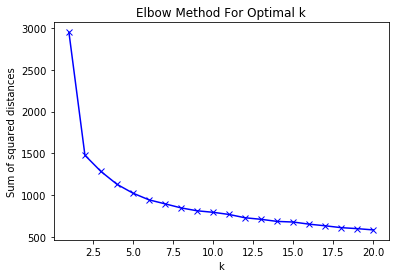

In [21]:
#code credit@ https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(vals)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Figure 1: Graph showing elbow method to derive the optimal cluster value to input into KMEANS. Visually, k=2 seems to have the greatest change but in terms of slope change, k=5 might have a bigger change. Hence, chose 5 for number of cluster to be inputed in KMEANS

In [22]:
km5 = KMeans(n_clusters=5, random_state=444).fit(vals)
km5.labels_.shape

(230,)

In [23]:
km5.labels_

array([0, 0, 2, 2, 0, 1, 0, 2, 4, 0, 0, 4, 0, 4, 1, 2, 4, 0, 4, 4, 0, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 4, 2, 4, 2, 0, 0, 4, 2, 0, 4, 4, 4, 3,
       3, 1, 3, 1, 4, 0, 2, 4, 0, 3, 1, 1, 4, 0, 1, 4, 3, 3, 3, 3, 4, 4, 4,
       2, 3, 1, 4, 2, 1, 1, 2, 4, 1, 3, 1, 1, 4, 2, 4, 0, 1, 0, 1, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       4, 2, 0, 2, 2, 2, 3, 3, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 4, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 0, 0, 0, 2, 2, 2, 4, 2, 2, 2, 2, 0], dtype=int32)

Understanding KMEANS function: @https://stackoverflow.com/questions/17788431/scikit-learn-how-to-know-documents-in-the-cluster

- Apparently, "km.labels_" is how we collect cluster assignments from running KMEANS.
- There is also the the centroid vector known as "km.cluster_centers_"

### KMEAN CLUSTER 5

In [24]:
### creating a new column to store the km labels so that it can be plotted 
vals['cluster5'] = km5.labels_

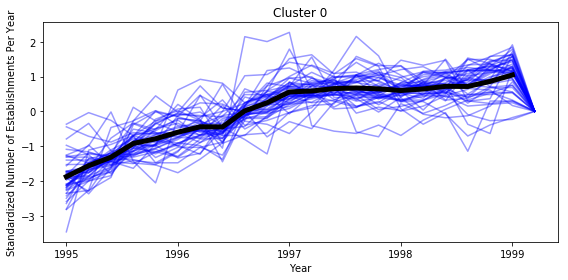

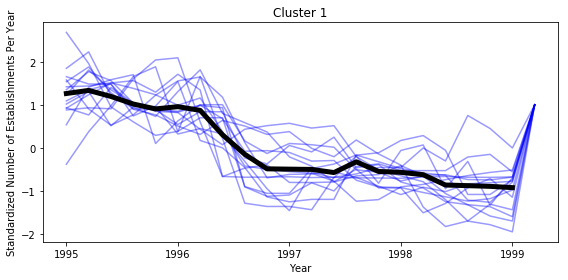

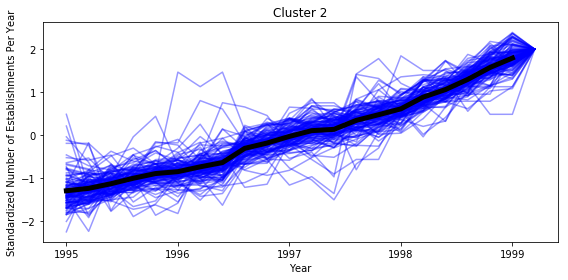

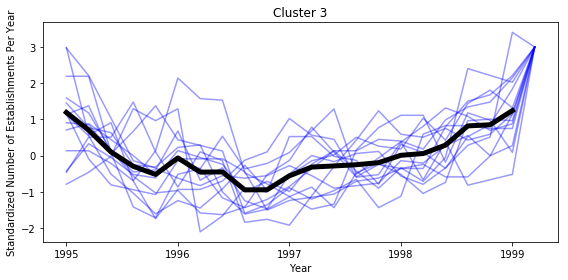

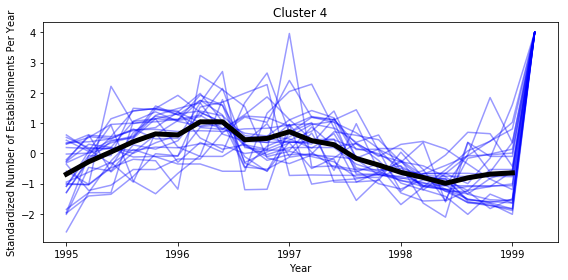

In [25]:
# code credit: mei@yg833
for i in range(5):
    fig=plt.figure(figsize=(8,4))
    ax=fig.add_subplot(111)
    
    vals[vals['cluster5'] == i][:-1].transpose().plot(legend = False, ax = ax, color = 'blue', alpha = 0.4)
    plt.plot(km5.cluster_centers_[i], color = 'black', linewidth = 5)
    ax.set_xticklabels(range(1994, 2014), fontsize=10)
    ax.set_title('Cluster ' + str(i))
    ax.set_xlabel('Year')
    ax.set_ylabel('Standardized Number of Establishments Per Year')
    plt.tight_layout()

Figure 2: KMEANS 5 clusters plotted individually against time. The black line shows the overall trend for each row of data, ie each zipcode. Cluster 0 shows a trend that is increasing at a decreasing rate, cluster 1 shows a decreasing trend, cluster 2 shows an increasing trend, cluster 3 shows a trend that has reached a trough and is climbing back up while cluster 4 shows a trend that has reached a peak and is decreasing over time. 

To plot a chloropeth, need basemap:

In [26]:
nyczipsshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


Need to add data from KMEANS into basemap: 

In [27]:
nyczipsshp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
ZIPCODE       263 non-null object
BLDGZIP       263 non-null object
PO_NAME       263 non-null object
POPULATION    263 non-null float64
AREA          263 non-null float64
STATE         263 non-null object
COUNTY        263 non-null object
ST_FIPS       263 non-null object
CTY_FIPS      263 non-null object
URL           263 non-null object
SHAPE_AREA    263 non-null float64
SHAPE_LEN     263 non-null float64
geometry      263 non-null object
dtypes: float64(4), object(9)
memory usage: 26.8+ KB


In [28]:
#converting zipcode to int so that it can be merged with the other table later on
nyczipsshp['ZIPCODE'] = nyczipsshp[['ZIPCODE']].astype(int)
nyczipsshp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
ZIPCODE       263 non-null int64
BLDGZIP       263 non-null object
PO_NAME       263 non-null object
POPULATION    263 non-null float64
AREA          263 non-null float64
STATE         263 non-null object
COUNTY        263 non-null object
ST_FIPS       263 non-null object
CTY_FIPS      263 non-null object
URL           263 non-null object
SHAPE_AREA    263 non-null float64
SHAPE_LEN     263 non-null float64
geometry      263 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 26.8+ KB


In [29]:
vals.reset_index(inplace=True)
vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 23 columns):
ZIP         230 non-null int64
1994        230 non-null float64
1995        230 non-null float64
1996        230 non-null float64
1997        230 non-null float64
1998        230 non-null float64
1999        230 non-null float64
2000        230 non-null float64
2001        230 non-null float64
2002        230 non-null float64
2003        230 non-null float64
2004        230 non-null float64
2005        230 non-null float64
2006        230 non-null float64
2007        230 non-null float64
2008        230 non-null float64
2009        230 non-null float64
2010        230 non-null float64
2011        230 non-null float64
2012        230 non-null float64
2013        230 non-null float64
2014        230 non-null float64
cluster5    230 non-null int32
dtypes: float64(21), int32(1), int64(1)
memory usage: 40.5 KB


In [30]:
nyczip_kmeans2 = nyczipsshp.merge(vals, left_on='ZIPCODE', right_on='ZIP')
nyczip_kmeans2.columns

Index([   'ZIPCODE',    'BLDGZIP',    'PO_NAME', 'POPULATION',       'AREA',
            'STATE',     'COUNTY',    'ST_FIPS',   'CTY_FIPS',        'URL',
       'SHAPE_AREA',  'SHAPE_LEN',   'geometry',        'ZIP',         1994,
               1995,         1996,         1997,         1998,         1999,
               2000,         2001,         2002,         2003,         2004,
               2005,         2006,         2007,         2008,         2009,
               2010,         2011,         2012,         2013,         2014,
         'cluster5'],
      dtype='object')

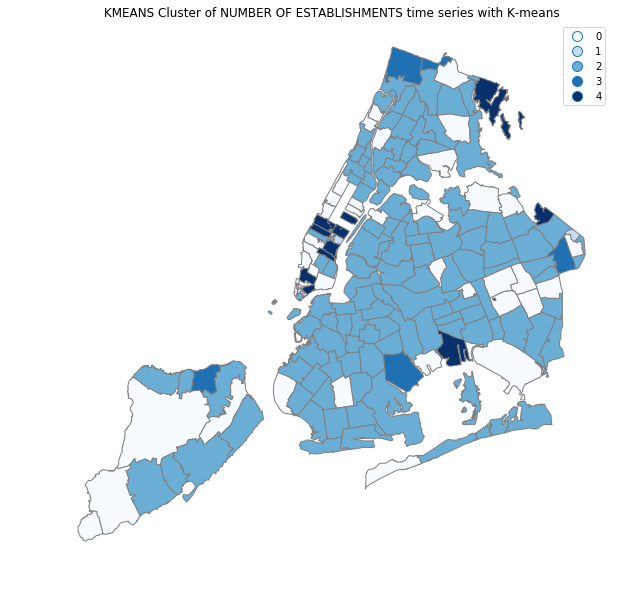

In [31]:
f, ax = plt.subplots(figsize=(10,10))

nyczip_kmeans2.plot(ax=ax, column='cluster5', cmap='Blues', edgecolor='grey', legend=True, categorical=True)

ax.set_axis_off()

ax.set_title("KMEANS Cluster of NUMBER OF ESTABLISHMENTS time series with K-means");

Figure 3: Chloropleth of cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top. It is important to note that although the legend shows continous values, the values are in actual fact discrete ie only 0,1,2,3,4 should be considered.  

### KMEAN CLUSTER 7

with 7 clusters now instead of 5

In [32]:
cn = 7
km7= sklearn.cluster.KMeans(n_clusters=cn, random_state=444).fit(vals)
km7.labels_.shape

(230,)

In [33]:
vals.reset_index(inplace=True)

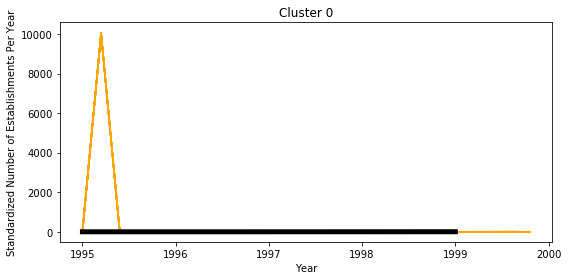

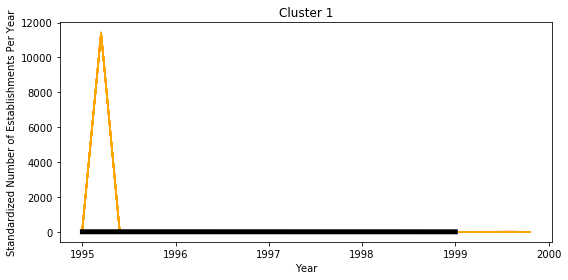

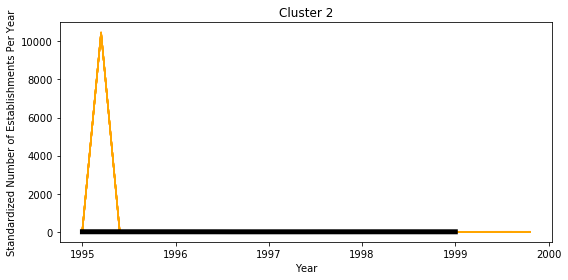

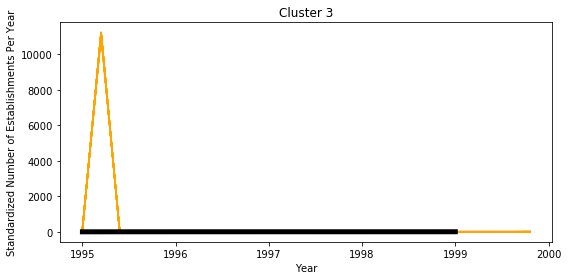

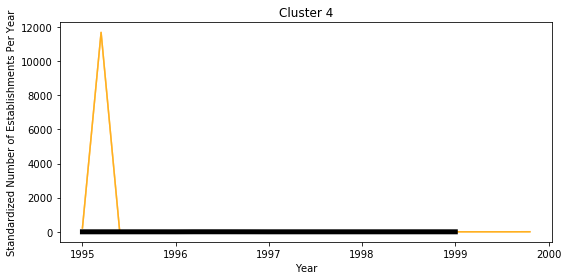

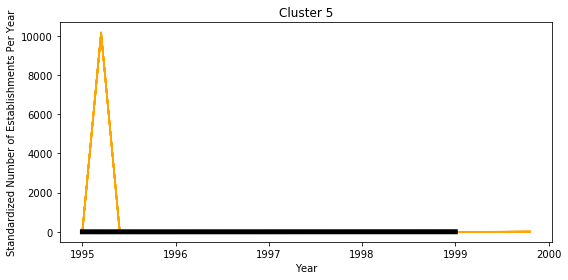

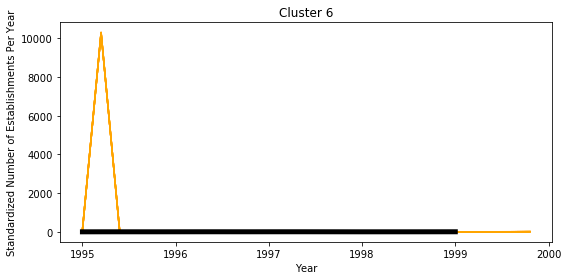

In [34]:
vals['cn'] = km7.labels_
for i in range(cn):
    fig=plt.figure(figsize=(8,4))
    ax=fig.add_subplot(111)
    vals[vals['cn']==i][:-1].transpose().plot(legend=False, ax=ax, color='orange', alpha=0.4)
    plt.plot(km.cluster_centers_[i], color='black', linewidth=5)
    ax.set_xticklabels(range(1994, 2014), fontsize=10)
    ax.set_title('Cluster ' + str(i))
    ax.set_xlabel('Year')
    ax.set_ylabel('Standardized Number of Establishments Per Year')
    plt.tight_layout()

Figure 4: Supposed to be a 7 cluster individual plot but for some reasons my plots are not showing despite it being the same code i have used before. So i gave up on this i really couldnt debug despite my line of codes being the same as my friends too. I believe it is a kernel issue :(

In [35]:
nyczip_kmeans7 = nyczipsshp.merge(vals, left_on='ZIPCODE', right_on='ZIP')
nyczip_kmeans7.columns

Index([   'ZIPCODE',    'BLDGZIP',    'PO_NAME', 'POPULATION',       'AREA',
            'STATE',     'COUNTY',    'ST_FIPS',   'CTY_FIPS',        'URL',
       'SHAPE_AREA',  'SHAPE_LEN',   'geometry',      'index',        'ZIP',
               1994,         1995,         1996,         1997,         1998,
               1999,         2000,         2001,         2002,         2003,
               2004,         2005,         2006,         2007,         2008,
               2009,         2010,         2011,         2012,         2013,
               2014,   'cluster5',         'cn'],
      dtype='object')

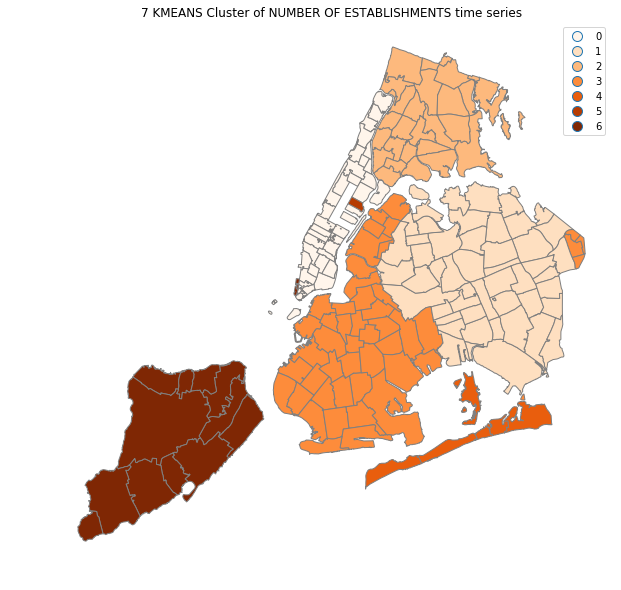

In [37]:
f, ax = plt.subplots(figsize=(10,10))

nyczip_kmeans7.plot(ax=ax, column='cn', cmap='Oranges', edgecolor='grey', legend=True, categorical=True)

ax.set_axis_off()

ax.set_title("7 KMEANS Cluster of NUMBER OF ESTABLISHMENTS time series");

Figure 5: KMEANS clustering for k=7. The clusters seems to have split according to borough shape! 

# #2 Clustering with hierarchial clustering

In [38]:
nyc_zips = nyczipsshp['ZIPCODE'].unique()

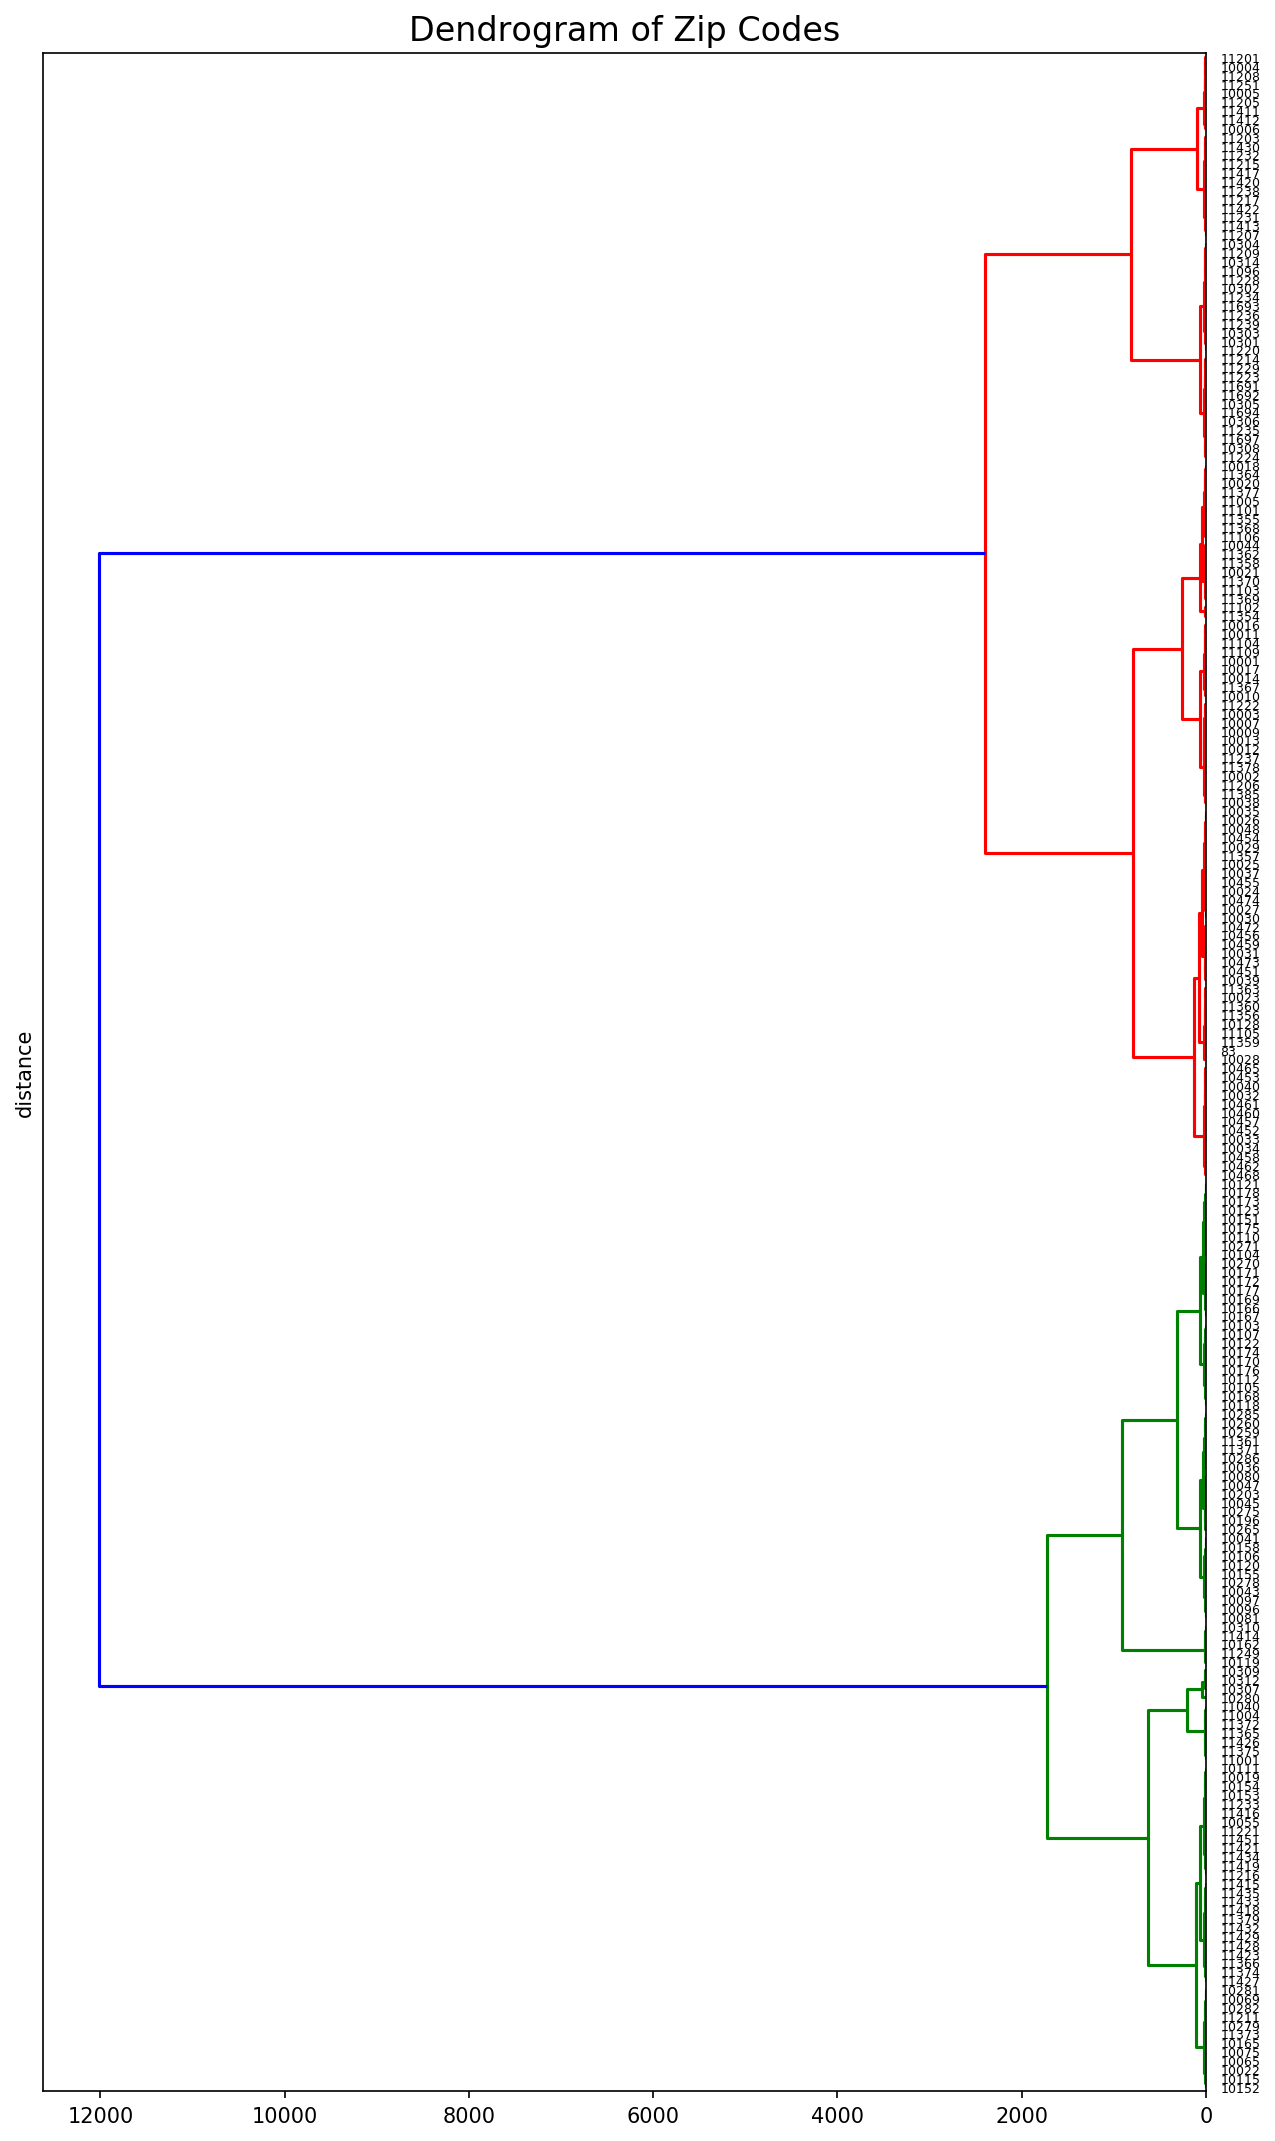

In [39]:
fig = plt.figure(figsize=(10,18), dpi=150)
plt.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = nyc_zips, orientation = 'left',
                               #leaf_rotation=90,  # rotates the x axis labels
                               leaf_font_size=6.)  # font size for the x axis labels)
plt.title("Dendrogram of Zip Codes", fontsize=16)

Figure 6: Dendrogram of Zip Codes. It can be observed that there are two clusters, and these two clusters are branched to each other from x=2000.